In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
# df_train

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
y = df_train.SalePrice
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size = 0.3,random_state= 0)

In [6]:
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_train_num = df_train[numerical_features]
df_train_cat = df_train[categorical_features]

Numerical features : 37
Categorical features : 43


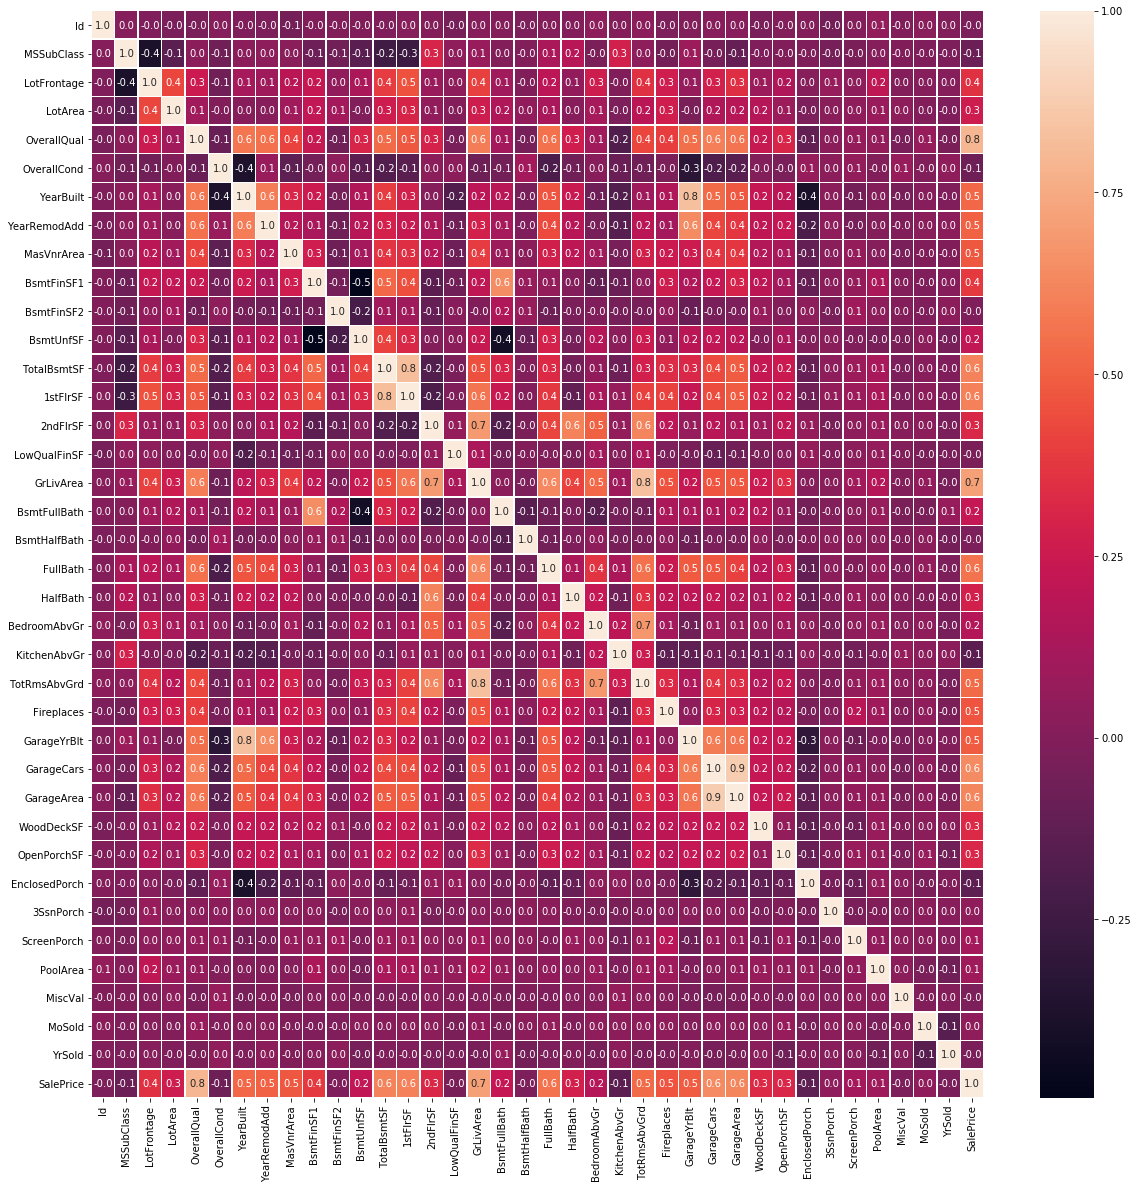

In [7]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

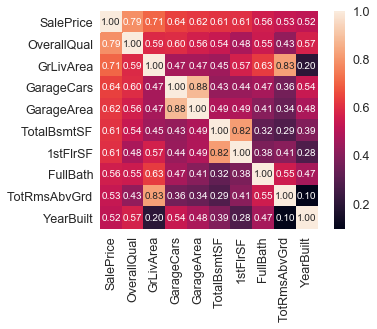

81

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

m = len(df_train.columns)
m

In [9]:
cor_target = abs(corrmat["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [10]:
# import statsmodels.api as sm
# X1 = sm.add_constant(X_test)
# result = sm.OLS(y_test, X1).fit()
# #print dir(result)

# print("Adjusted r2 = ", result.rsquared_adj)

In [11]:
# result.summary()

In [12]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

1

In [14]:
m - len(df_train.columns)

18

In [15]:
columns = np.full((df_train.corr().shape[0],), True, dtype=bool)
for i in range(df_train.corr().shape[0]):
    for j in range(i+1, df_train.corr().shape[0]):
        if(df_train.corr().iloc[i,j] >= 0.66):
            if(columns[j]):
                print(df_train.columns[j])
                columns[j] = False
                
cols = list(df_train.columns)
if(columns[columns.any=()=False]):
    cols.remove(columns[Columns==False])
    

# selected_columns = df_train.columns[columns]
# df_train = df_train[selected_columns]
# print(df_train.columns)
len(df_train.columns)

SyntaxError: invalid syntax (<ipython-input-15-bf90c9bd2bc6>, line 10)

In [ ]:
df_train = pd.get_dummies(df_train)
# df_train

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [ ]:
# plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
# plt.scatter(test_pre, test_pre - y_test, c = "black",  label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 0, xmax = 800000, color = "red")
# # plt.hlines([10.5, 13.5], [10.5, 13.5], c = "red")
# plt.show()

In [ ]:
y = df_train.SalePrice
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size = 0.3,random_state= 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

In [ ]:
from sklearn.metrics import r2_score
r2_score_test = r2_score(y_test, test_pre)
print("R2 Score for test", r2_score_test)
r2_score_train = r2_score(y_test, test_pre)
print("R2 Score for train", r2_score_train)

In [ ]:
import statsmodels.api as sm
X1 = sm.add_constant(X_test)
result = sm.OLS(y_test, X1).fit()
#print dir(result)

print("Adjusted r2 = ", result.rsquared_adj)

In [ ]:
result.summary()

In [ ]:
result.pvalues

In [ ]:
cols = list(df_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
X1 = sm.add_constant(X_test)
result = sm.OLS(y_test, X1).fit()
#print dir(result)

print("Adjusted r2 = ", result.rsquared_adj)

In [ ]:
result.summary()

In [ ]:
Ls = LassoCV()
Ls.fit(X_train, y_train)

In [ ]:
Rr = RidgeCV()
Rr.fit(X_train, y_train)

# maxcoef = np.argsort(-np.abs(Rr.coef_))
# coef = Rr.coef_[maxcoef]
# for i in range(0, 5):
#     print("{:.<025} {:< 010.4e}".format(df_train.columns[maxcoef[i]], coef[i]))

In [ ]:
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5))
train_EN = EN.fit(X_train, y_train)

In [ ]:
model = [Ls, Rr, EN]
M = len(model)
CV = 5
score = np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], X_train, y_train, cv=CV)

In [ ]:
print(score.mean(axis=1))